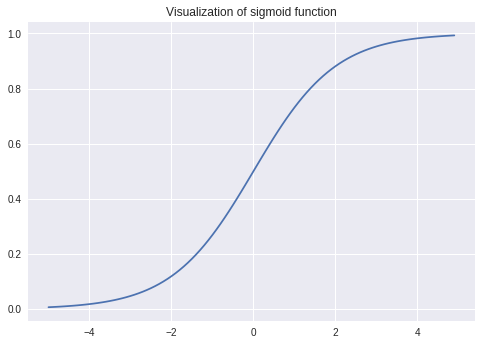

In [0]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder 


def sigmoid(z):
    return 1/(1+ np.exp(-z))

plt.plot(np.arange(-5,5,0.1), sigmoid(np.arange(-5,5,0.1)))
plt.title("Visualization of sigmoid function")
plt.show()

In [0]:
data = pd.read_csv('dataset.csv')
print("data shape: ", data.shape)
print(data.head())

data shape:  (99, 4)
   0  5.1  3.5  1
0  1  4.9  3.0  1
1  2  4.7  3.2  1
2  3  4.6  3.1  1
3  4  5.0  3.6  1
4  5  5.4  3.9  1


In [0]:
# Feature Matrix 
x_orig = data.iloc[:, 1:-1].values 

# Data labels 
y_orig = data.iloc[:, -1:].values 

print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 


Shape of Feature Matrix: (99, 2)
Shape Label Vector: (99, 1)


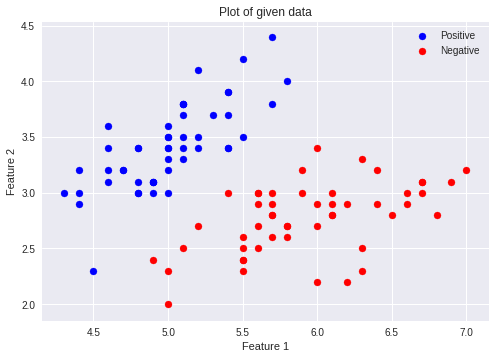

In [0]:

# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
  
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of given data') 
plt.legend() 
  
plt.show() 


In [0]:
#creating one hot encoder

oneHot = OneHotEncoder()

#encoding x_orig

oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()

#encoding y_orig

oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()

alpha, epochs = 0.0035, 500
m,n = x.shape

print("m = ",m)
print("n = ",n)
print("Learning rate= ", alpha)
print("epochs = ", epochs)

m =  99
n =  7
Learning rate=  0.0035
epochs =  500


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [8]:
# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 

# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 

# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 

# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 

# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
					logits = Y_hat, labels = Y) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
		learning_rate = alpha).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [11]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Lists for storing the changing Cost and Accuracy in every Epoch 
	cost_history, accuracy_history = [], [] 
	
	# Iterating through all the epochs 
	for epoch in range(epochs): 
		cost_per_epoch = 0
		
		# Running the Optimizer 
		sess.run(optimizer, feed_dict = {X : x, Y : y}) 
		
		# Calculating cost on current Epoch 
		c = sess.run(cost, feed_dict = {X : x, Y : y}) 
		
		# Calculating accuracy on current Epoch 
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
										tf.argmax(Y, 1)) 
		accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
												tf.float32)) 
		
		# Storing Cost and Accuracy to the history 
		cost_history.append(sum(sum(c))) 
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
		
		# Displaying result on current Epoch 
		if epoch % 100 == 0 and epoch != 0: 
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1])) 
	
	Weight = sess.run(W) # Optimized Weight 
	Bias = sess.run(b) # Optimized Bias 
	
	# Final Accuracy 
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
									tf.argmax(Y, 1)) 
	accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
											tf.float32)) 
	print("\nAccuracy:", accuracy_history[-1], "%") 


Epoch 100 Cost: 124.54440689086914
Epoch 200 Cost: 119.54268264770508
Epoch 300 Cost: 117.06705093383789
Epoch 400 Cost: 115.47733306884766

Accuracy: 90.90909361839294 %


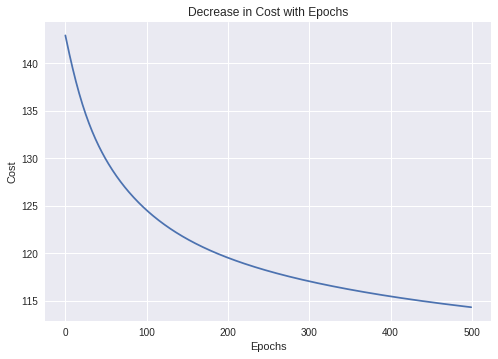

In [12]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 

plt.show() 


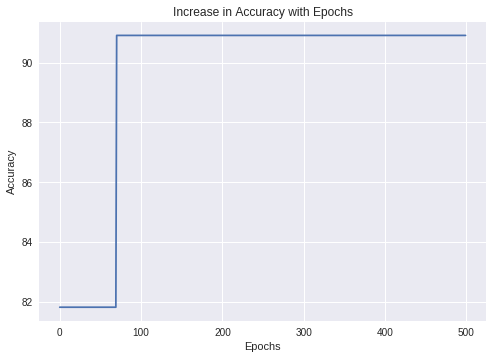

In [13]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 

plt.show() 


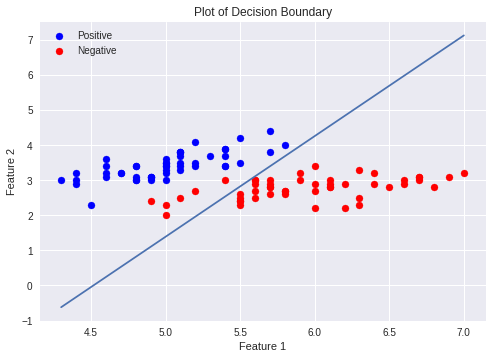

In [16]:

# Calculating the Decision Boundary 
decision_boundary_x = np.array([np.min(x_orig[:, 0]), 
                               np.max(x_orig[:, 0])]) 
  
decision_boundary_y = (- 1.0 / Weight[0])*(decision_boundary_x * Weight + Bias) 
  
decision_boundary_y = [sum(decision_boundary_y[:, 0]),  
                       sum(decision_boundary_y[:, 1])] 
  
# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig))  
                                    if y_orig[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], 
  color = 'blue', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], 
   color = 'red', label = 'Negative') 
  
# Plotting the Decision Boundary 
plt.plot(decision_boundary_x, decision_boundary_y) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.title('Plot of Decision Boundary') 
plt.legend() 
  
plt.show() 

